Run this if you are using this in Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Change directory to the project path

In [2]:
%cd gdrive/My Drive/UCI/cs274p

/content/gdrive/My Drive/UCI/cs274p


Install dependencies

In [3]:
pip install -r requirements.txt

     |████████████████████████████████| 122kB 4.2MB/s 
     |████████████████████████████████| 788kB 7.9MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 112kB 14.8MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 174kB 12.9MB/s 
     |████████████████████████████████| 9.7MB 13.3MB/s 
     |████████████████████████████████| 7.1MB 47.8MB/s 
     |████████████████████████████████| 358kB 49.7MB/s 
     |████████████████████████████████| 133kB 52.8MB/s 
     |████████████████████████████████| 921kB 45.0MB/s 
     |████████████████████████████████| 512kB 35.6MB/s 
     |████████████████████████████████| 1.1MB 47.7MB/s 
     |████████████████████████████████| 501kB 40.8MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
  Created wheel for tornado: filename=tornado-6.0.4-cp36-cp36m-linux_x86_64.whl size=427630 sha256=60d3da34ee3a32b890b0bfcfcf7acf4ca315d3aa56df1ca19df52a664b645e6c
  St

In [0]:
import numpy as np
import pandas as pd
import math
from pprint import pprint
from tqdm.notebook import tqdm
import xgboost as xgb
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
sc = MinMaxScaler((-1, 1))

In [0]:
df = pd.read_csv('data/heart.csv')

In [9]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
df.shape
y = df['target']
X = df.drop('target', axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
xg_class = xgb.XGBClassifier(objective='binary:hinge', colsample_bytree = 0.3, learning_rate = 0.9,
                max_depth = 5, alpha = 10, n_estimators = 20)

In [90]:
xg_class.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
preds = xg_class.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.95%


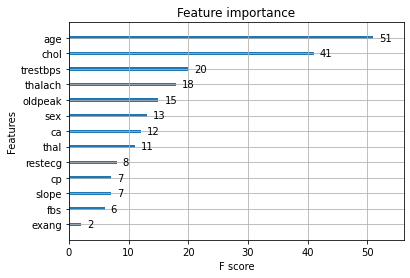

In [93]:
plot_importance(xg_class)
pyplot.show()

# Lets look at the data

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [95]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [96]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


| Column | Description   |
|--------|---------------|
|   age       | Age in years  |
|   sex       | (1 = male; 0 = female)  |
|   cp        | chest pain type  |
|   trestbps  | resting blood pressure (in mm Hg on admission to the hospital) |
|   chol      | serum cholestoral in mg/dl  |
|   fbs       | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) |
|   restecg   | resting electrocardiographic results  |
|   thalach   | maximum heart rate achieved  |
|   exang     | exercise induced angina (1 = yes; 0 = no)  |
|   oldpeak   | ST depression induced by exercise relative to rest  |
|   slope     | the slope of the peak exercise ST segment  |
|   ca        | number of major vessels (0-3) colored by flourosopy  |
|   thal      | 3 = normal; 6 = fixed defect; 7 = reversable defect |
|   target    | 1 = heart disease; 0 = no heart disease |


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Lets use the pairplot too to represent the univ

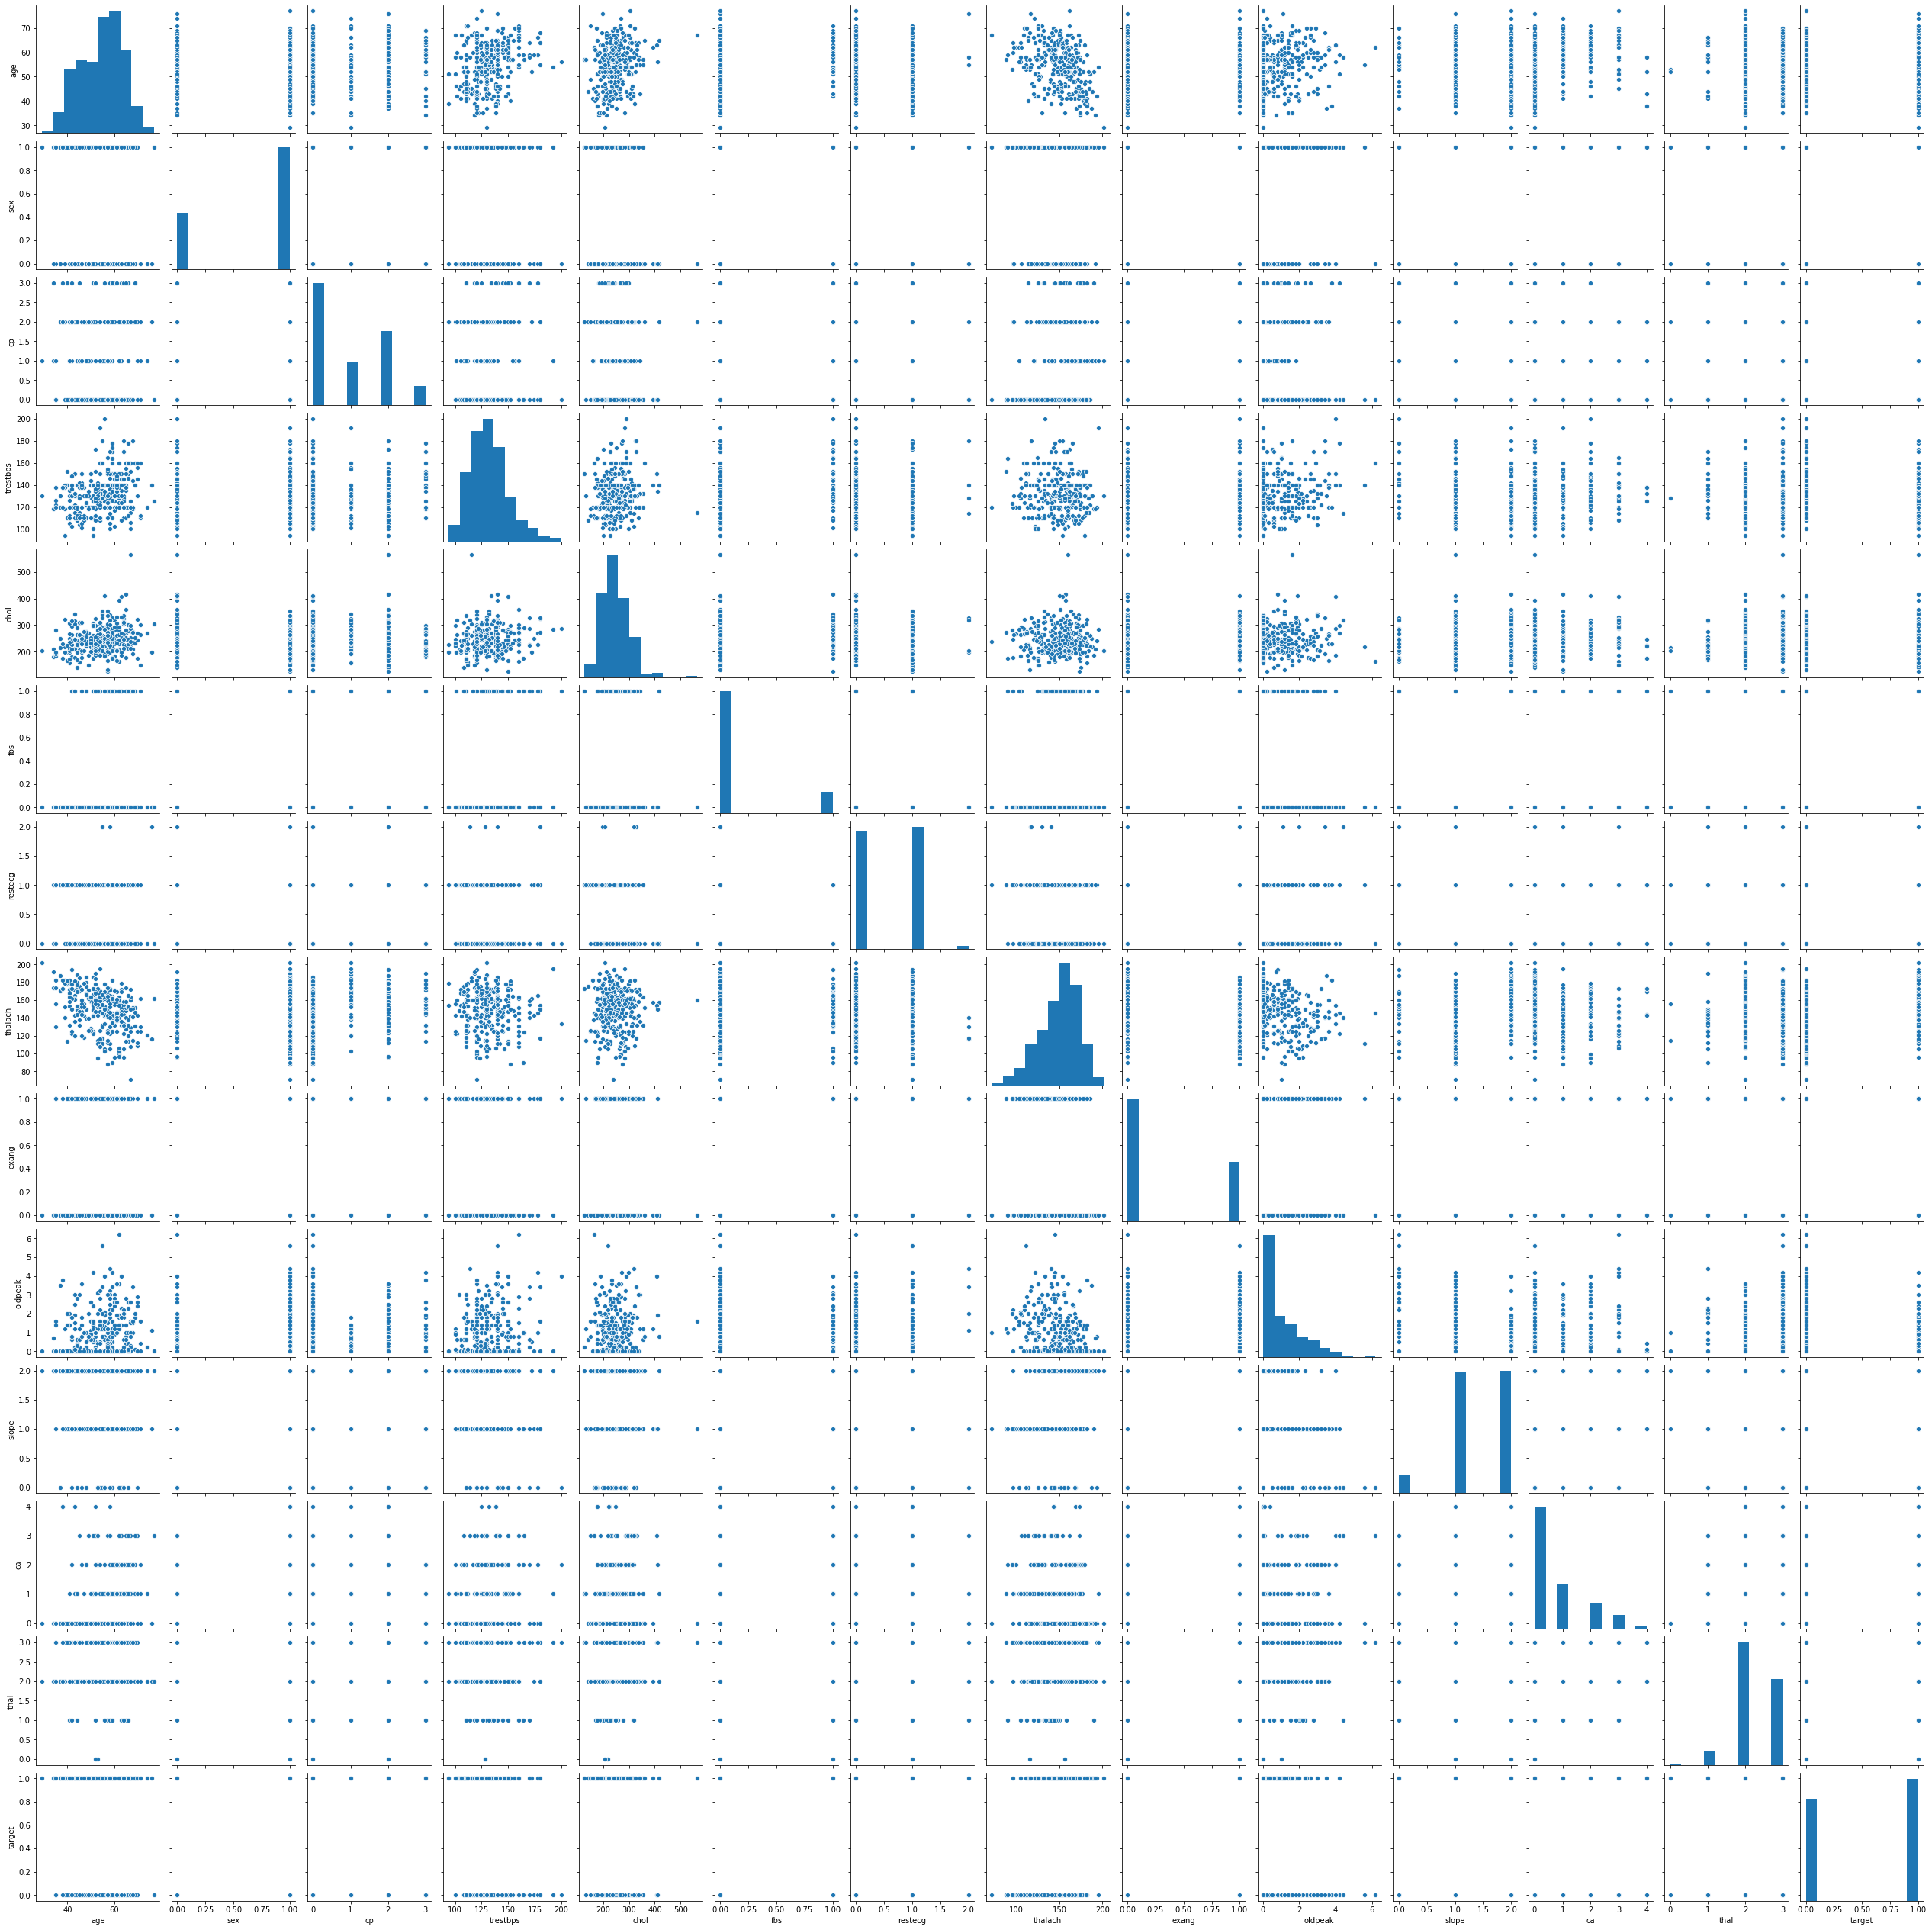

In [50]:
sns.pairplot(df)

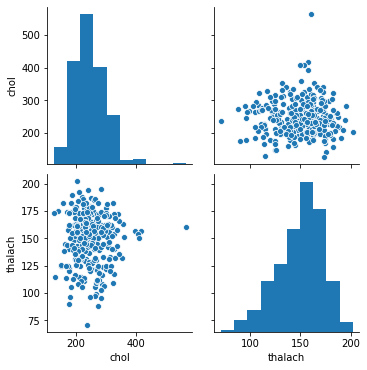

In [98]:
sns.pairplot(df[['chol', 'thalach']])

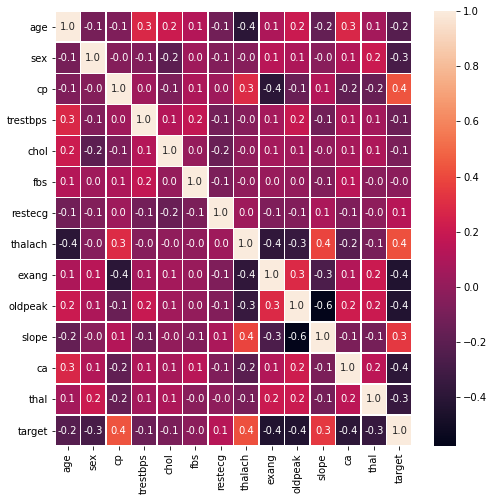

In [58]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

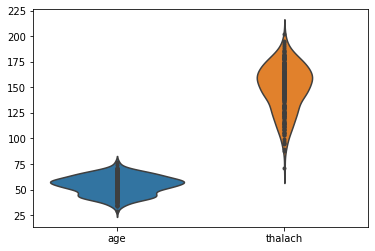

In [99]:
sns.violinplot(data=df[['age', 'thalach']], inner="points")
plt.show()

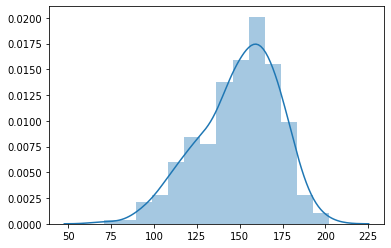

In [77]:
sns.distplot(df[['thalach']],kde = True)

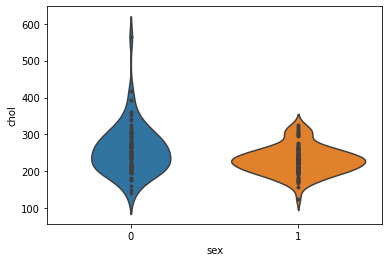

In [86]:
sns.violinplot(x='sex', y='chol', data=df[df.target==1], inner="points")
plt.show()

# Excercises

1. Parse the other 4 files for Heart Disease
2. What other conclusions can you make about the data and why
3. Can you generate more features that would contribute to the overall accuracy